## AI소프트웨어과 2021143015 이용민

## 주제: 2010-2018년에 서울에서 발생한 교통사고 분석

In [1]:
# 데이터 전처리에 필요한 모듈 import
import pandas as pd
import numpy as np

### 2) 교통사고정보 데이터 전처리 및 시각화

In [26]:
Seoul_1018 = pd.read_excel('서울시 개별사고정보(2010_2018).xlsx')
Seoul_1018.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,20100101,00시,금,마포구,경상,서교동,0,0,1,0,...,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,20100101,00시,금,동작구,중상,대방동,0,1,3,0,...,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,20100101,00시,금,관악구,경상,신림동,0,0,2,0,...,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상
3,20100101,00시,금,강서구,경상,화곡동,0,0,1,0,...,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상
4,20100101,00시,금,구로구,경상,구로동,0,0,2,0,...,교차로,교차로내,승용차,남,33세,상해없음,승용차,남,55세,경상


In [108]:
Seoul_1018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362297 entries, 0 to 362296
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   발생일        362297 non-null  int64 
 1   발생시간       362297 non-null  object
 2   요일         362297 non-null  object
 3   발생지_시군구    362297 non-null  object
 4   사고내용       362297 non-null  object
 5   법정동명       362239 non-null  object
 6   사망자수       362297 non-null  int64 
 7   중상자수       362297 non-null  int64 
 8   경상자수       362297 non-null  int64 
 9   부상신고자수     362297 non-null  int64 
 10  사고유형_대분류   362297 non-null  object
 11  사고유형_중분류   362297 non-null  object
 12  사고유형       362297 non-null  object
 13  가해자법규위반    362296 non-null  object
 14  노면상태_대분류   362297 non-null  object
 15  노면상태       362297 non-null  object
 16  기상상태       362297 non-null  object
 17  도로형태_대분류   362297 non-null  object
 18  도로형태       362297 non-null  object
 19  가해자차종      362297 non-null  object
 20  가해성별

        발생일자 발생시간 발생지_시군구 사고유형_대분류 사고유형_중분류  사망자수  중상자수  경상자수  부상신고자수 가해성별  \
0 2010-01-01  00시     마포구      차대차       기타     0     0     1       0    남   
1 2010-01-01  00시     동작구      차대차       추돌     0     1     3       0    남   
2 2010-01-01  00시     관악구      차대차       추돌     0     0     2       0    남   
3 2010-01-01  00시     강서구      차대차       기타     0     0     1       0    남   
4 2010-01-01  00시     구로구      차대차     정면충돌     0     0     2       0    남   

  피해자성별     인구수    면적  
0     남  380000  23.2  
1     남  370000  16.3  
2     남  480000  29.5  
3     남  590000  41.4  
4     남  410000  20.1  

구별 사고율:
   발생지_시군구   사고건수     인구수       사고율
0      강남구  32916  500000  6.583200
1      강동구  12798  430000  2.976279
2      강북구  11009  310000  3.551290
3      강서구  15754  590000  2.670169
4      관악구  14354  480000  2.990417
5      광진구  11699  340000  3.440882
6      구로구  13657  410000  3.330976
7      금천구   8702  240000  3.625833
8      노원구  13935  520000  2.679808
9      도봉구   8375 

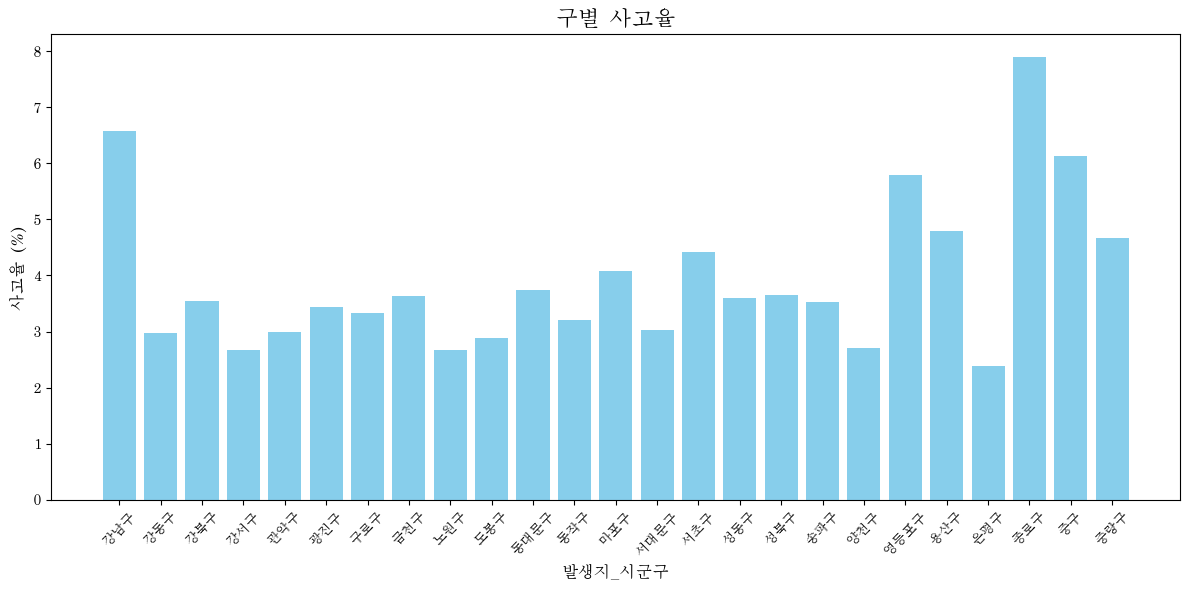

In [72]:
import pandas as pd

# 데이터 로드
file_path = '서울시 개별사고정보(2010_2018).xlsx'
data = pd.read_excel(file_path)

# 데이터 전처리
# 1. 발생일, 발생시간 열에서 날짜와 시간 정보 추출
data['발생년도'] = pd.to_datetime(data['발생일'], format='%Y%m%d').dt.year
data['발생월'] = pd.to_datetime(data['발생일'], format='%Y%m%d').dt.month
data['발생일자'] = pd.to_datetime(data['발생일'], format='%Y%m%d')

# 2. 필요 없는 열 삭제 (필요한 열만 남기기)
columns_to_keep = ['발생일자', '발생시간', '발생지_시군구', '사고유형_대분류', '사고유형_중분류',
                   '사망자수', '중상자수', '경상자수', '부상신고자수', '가해성별', '피해자성별']
data = data[columns_to_keep]

# 3. 결측값 처리
data.fillna('없음', inplace=True)

# 4. 구 리스트 기반 지역 데이터 생성
Seoul_1018_Gu = ['마포구', '동작구', '관악구', '강서구', '구로구', '서초구', '양천구', '도봉구', '은평구',
             '종로구', '서대문구', '강북구', '동대문구', '영등포구', '금천구', '강동구', '노원구', '중구',
             '광진구', '성북구', '성동구', '강남구', '송파구', '용산구', '중랑구']

# 가상의 인구수와 면적 데이터
population = [380000, 370000, 480000, 590000, 410000, 450000, 480000, 290000, 490000, 
              150000, 320000, 310000, 450000, 360000, 240000, 430000, 520000, 200000,
              340000, 390000, 280000, 500000, 680000, 250000, 330000]

area = [23.2, 16.3, 29.5, 41.4, 20.1, 47.0, 17.4, 20.8, 29.7,
        23.9, 17.6, 23.3, 14.2, 24.1, 13.0, 24.6, 35.4, 9.9,
        17.6, 24.6, 16.8, 39.5, 33.9, 21.9, 18.5]

# 지역 데이터프레임 생성
region_data = pd.DataFrame({
    '발생지_시군구': Seoul_1018_Gu,
    '인구수': population,
    '면적': area
})

# 5. 데이터 결합
merged_data = pd.merge(data, region_data, on='발생지_시군구', how='left')

# 6. 결합 데이터 확인
print(merged_data.head())

# 7. 구별 사고율 계산 및 추가
merged_data['사고건수'] = 1  # 각 행은 1건의 사고로 간주
accident_counts = merged_data.groupby('발생지_시군구')['사고건수'].sum().reset_index()
accident_counts = pd.merge(accident_counts, region_data, on='발생지_시군구', how='left')
accident_counts['사고율'] = (accident_counts['사고건수'] / accident_counts['인구수']) * 100

# 결과 출력
print("\n구별 사고율:")
print(accident_counts[['발생지_시군구', '사고건수', '인구수', '사고율']])

# 8. 구별 사고율 시각화
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Darwin':  # MacOS
    plt.rc('font', family='AppleMyungjo')

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.figure(figsize=(12, 6))
plt.bar(accident_counts['발생지_시군구'], accident_counts['사고율'], color='skyblue')
plt.title('구별 사고율', fontsize=16)
plt.xlabel('발생지_시군구', fontsize=12)
plt.ylabel('사고율 (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [5]:
# Column명  확인
print(Seoul_1018.columns, len(Seoul_1018.columns))

Index(['발생일', '발생시간', '요일', '발생지_시군구', '사고내용', '법정동명', '사망자수', '중상자수', '경상자수',
       '부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태',
       '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도',
       '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도'],
      dtype='object') 27


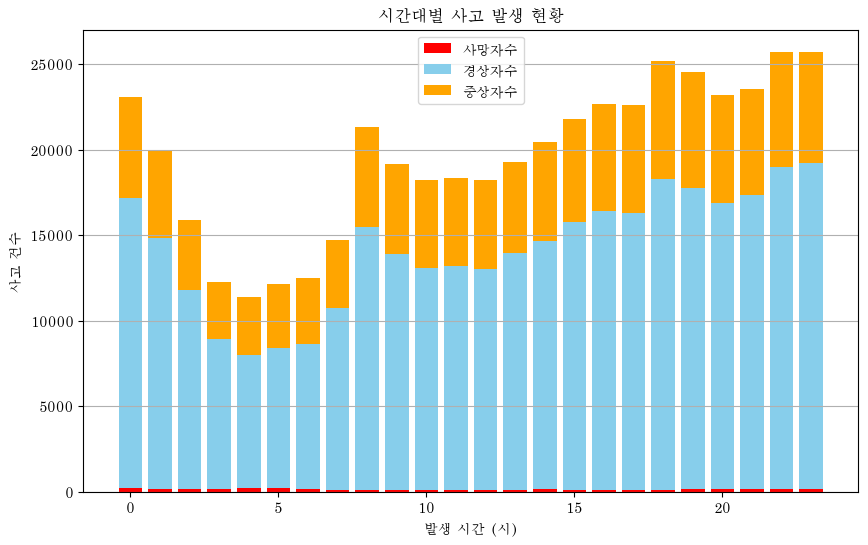

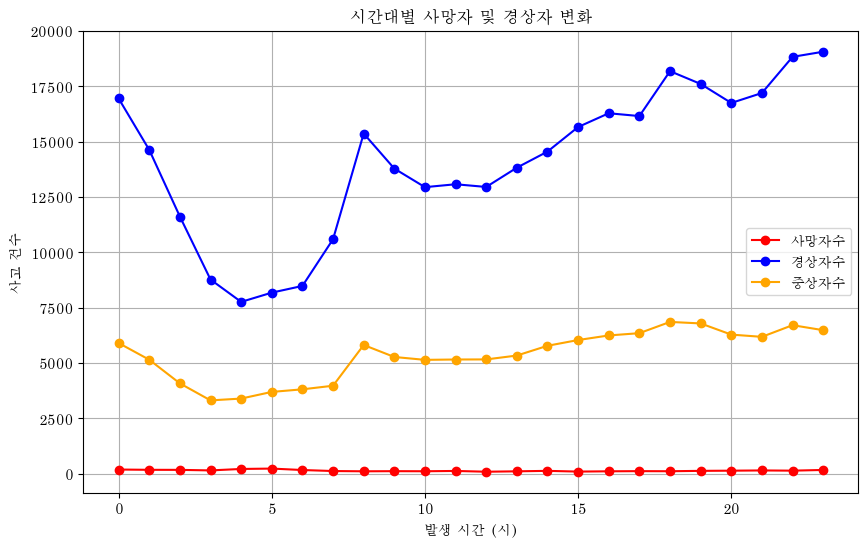

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = '서울시 개별사고정보(2010_2018).xlsx'
data = pd.read_excel(file_path)

# 필요한 열 확인 및 정리
# 주요 열: 발생시간, 사망자수, 경상자수, 중상자수
data['발생시간'] = data['발생시간'].str.replace('시', '').astype(int)  # '시' 제거 후 정수형 변환
data['사망자수'] = data['사망자수'].fillna(0).astype(int)
data['경상자수'] = data['경상자수'].fillna(0).astype(int)
data['중상자수'] = data['중상자수'].fillna(0).astype(int)

# 1. 시간대별 사고 분석
time_accidents = data.groupby('발생시간')[['사망자수', '경상자수', '중상자수']].sum()

# 시간대별 사고 건수 시각화
plt.rc('font', family='AppleMyungjo')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.figure(figsize=(10, 6))
plt.bar(time_accidents.index, time_accidents['사망자수'], color='red', label='사망자수')
plt.bar(time_accidents.index, time_accidents['경상자수'], color='skyblue', bottom=time_accidents['사망자수'], label='경상자수')
plt.bar(time_accidents.index, time_accidents['중상자수'], color='orange', bottom=time_accidents['사망자수'] + time_accidents['경상자수'], label='중상자수')
plt.title('시간대별 사고 발생 현황')
plt.xlabel('발생 시간 (시)')
plt.ylabel('사고 건수')
plt.legend()
plt.grid(axis='y')
plt.show()

# 2. 사망자와 경상자 수 비교
plt.figure(figsize=(10, 6))
plt.plot(time_accidents.index, time_accidents['사망자수'], 'r-', marker='o', label='사망자수')
plt.plot(time_accidents.index, time_accidents['경상자수'], 'b-', marker='o', label='경상자수')
plt.plot(time_accidents.index, time_accidents['중상자수'], 'orange', marker='o', label='중상자수')
plt.title('시간대별 사망자 및 경상자 변화')
plt.xlabel('발생 시간 (시)')
plt.ylabel('사고 건수')
plt.legend()
plt.grid()
plt.show()


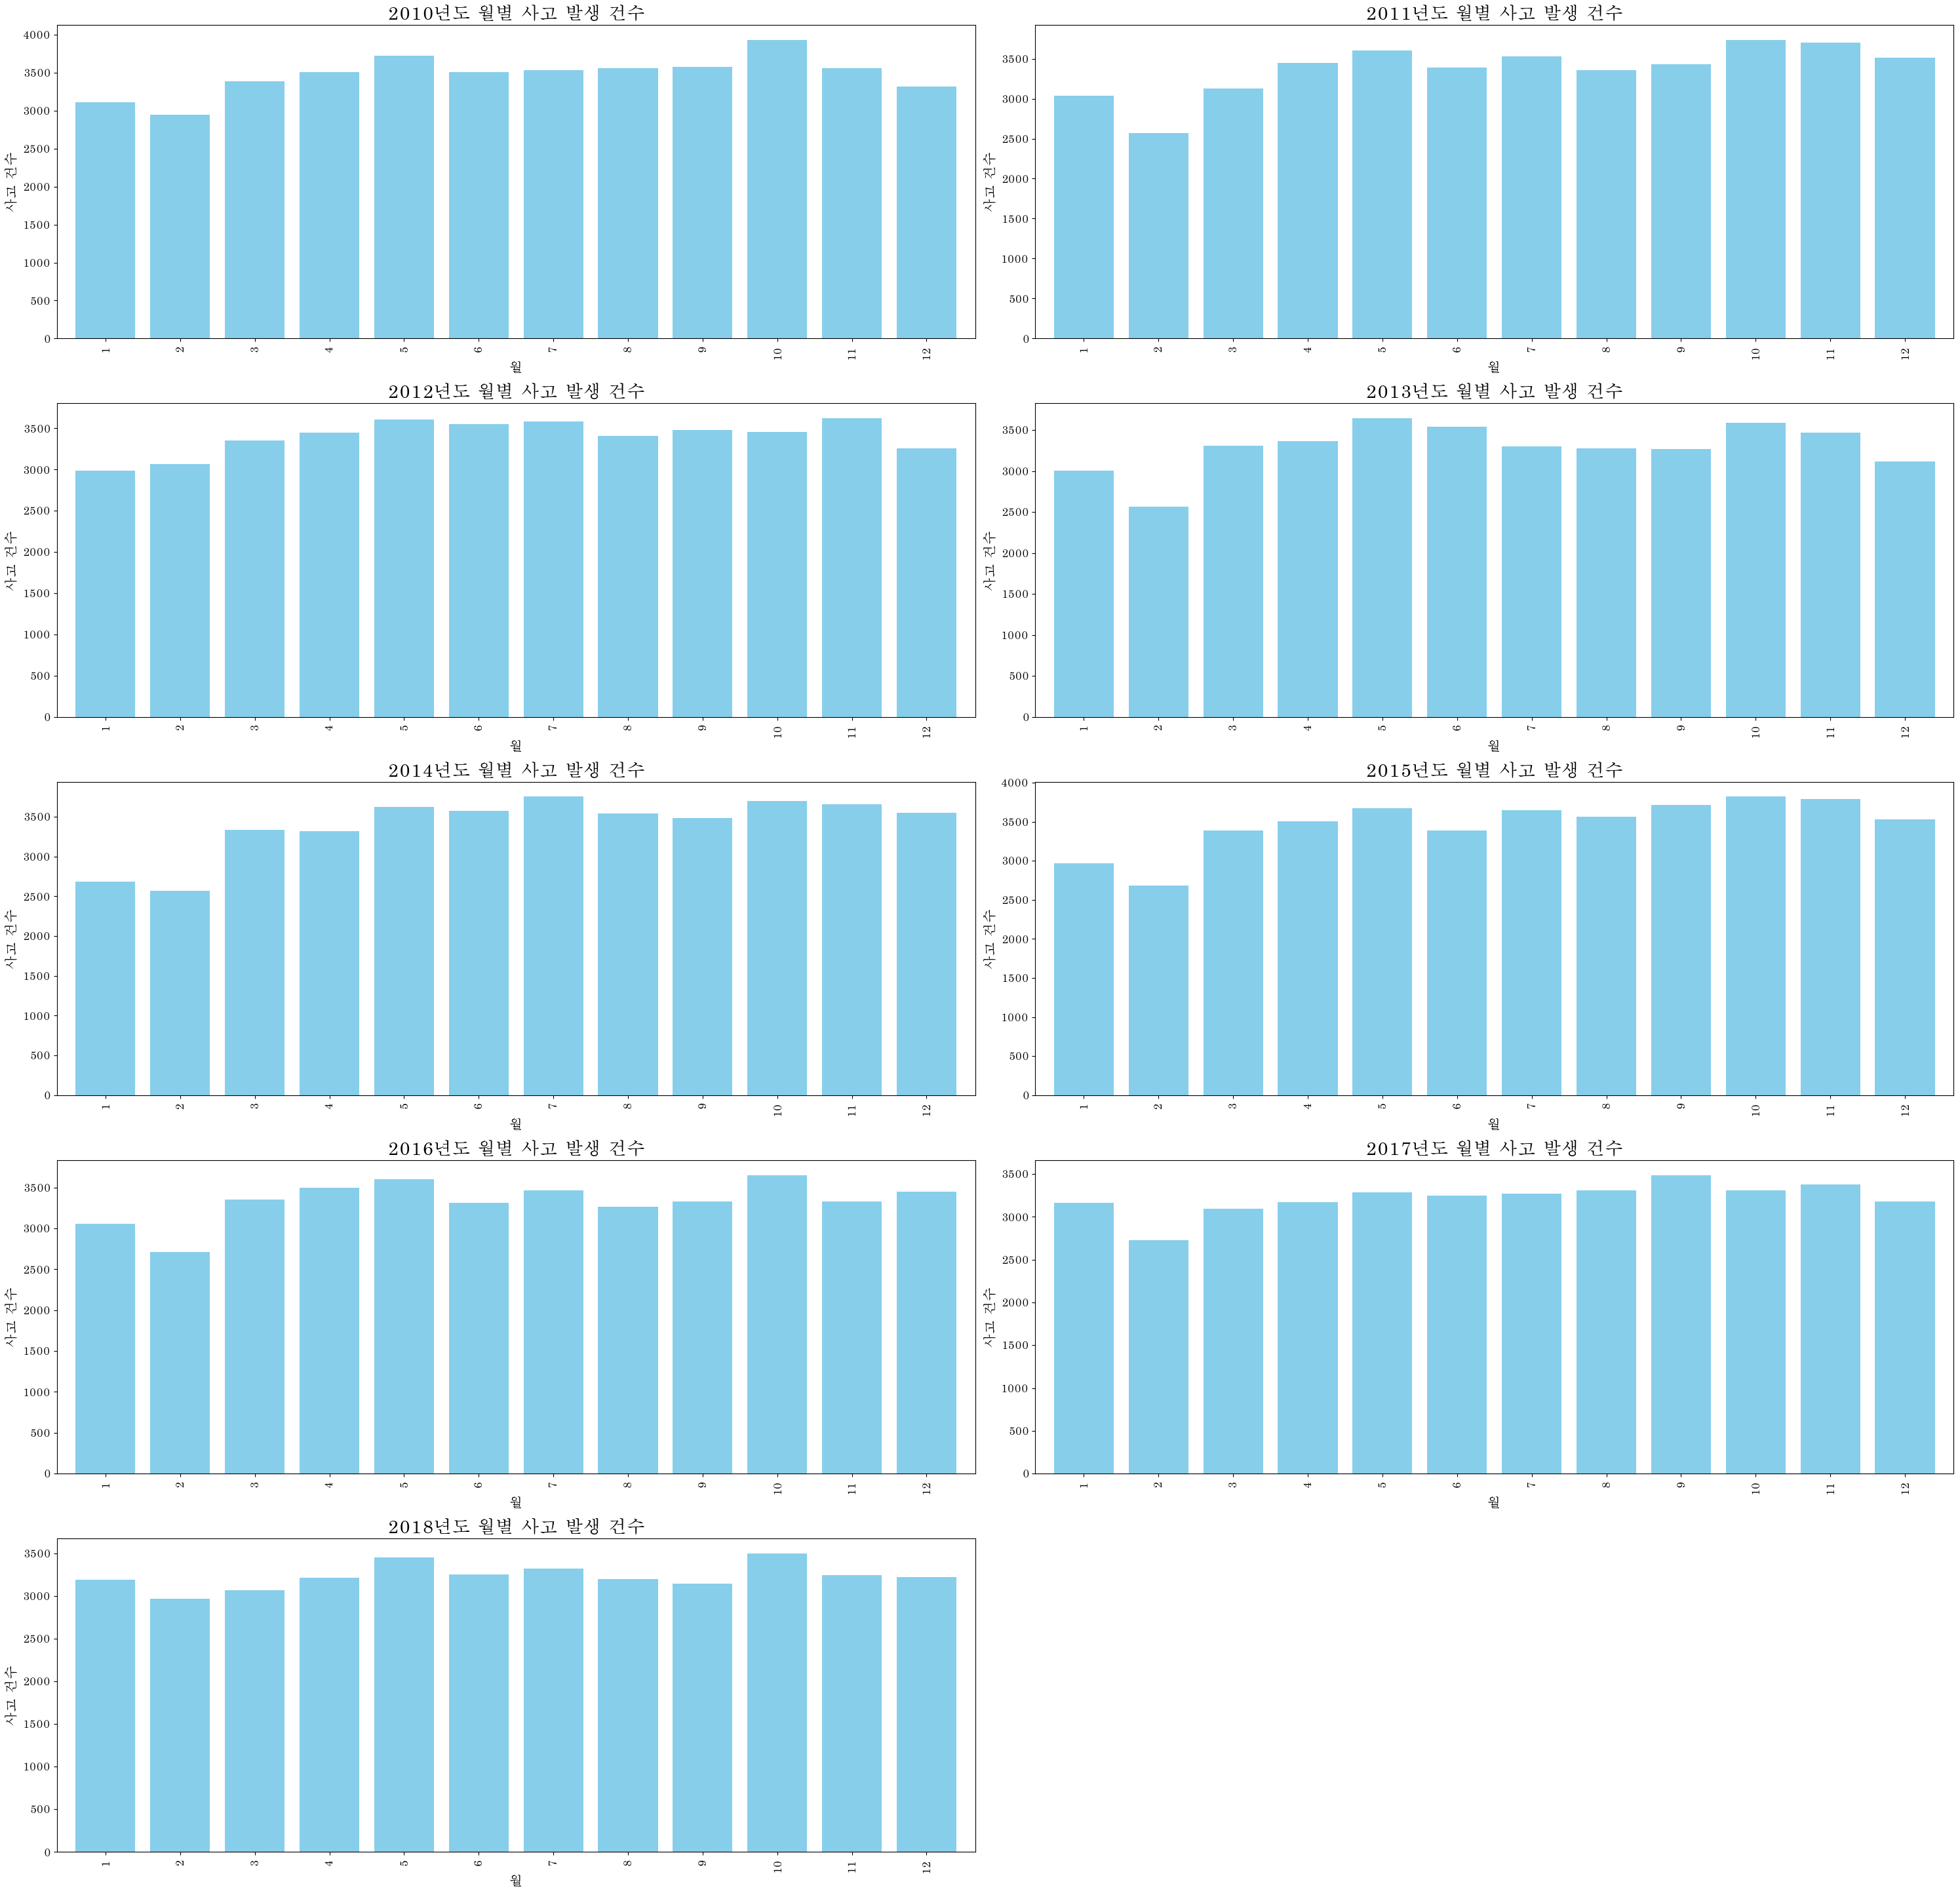

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (파일 이름에 맞게 변경)
file_path = '서울시 개별사고정보(2010_2018).xlsx'
data = pd.read_excel(file_path)

# 필요한 열 정리
data['발생년도'] = pd.to_datetime(data['발생일'], format='%Y%m%d').dt.year  # 발생일에서 연도 추출
data['발생월'] = pd.to_datetime(data['발생일'], format='%Y%m%d').dt.month  # 발생일에서 월 추출

# 그래프 설정
plt.figure(figsize=(30, 40))  # 전체 크기 설정

# 연도별로 순차적으로 그리기
years = sorted(data['발생년도'].unique())
for i, year in enumerate(years):
    plt.subplot(7, 2, i + 1)  # 7행 2열의 서브플롯에 그래프 배치
    year_data = data[data['발생년도'] == year]
    monthly_counts = year_data.groupby('발생월').size()  # 월별 사고 건수 계산
    monthly_counts.plot(kind='bar', color='skyblue', width=0.8)  # 막대그래프
    
    # 그래프 제목과 레이블 설정
    plt.title(f'{year}년도 월별 사고 발생 건수', fontsize=20)
    plt.xlabel('월', fontsize=15)
    plt.ylabel('사고 건수', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()  # 그래프 간 간격 자동 조정
plt.show()


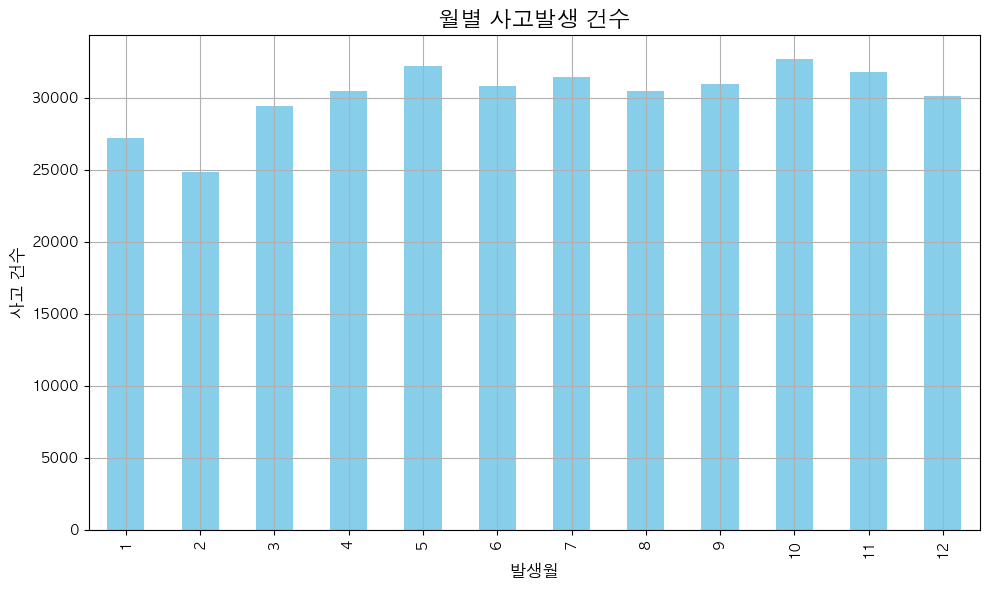

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (파일 이름에 맞게 변경)
file_path = '서울시 개별사고정보(2010_2018).xlsx'
data = pd.read_excel(file_path)

# 필요한 열 정리
data['발생년도'] = pd.to_datetime(data['발생일'], format='%Y%m%d').dt.year  # 발생일에서 연도 추출
data['발생월'] = pd.to_datetime(data['발생일'], format='%Y%m%d').dt.month  # 발생일에서 월 추출

# 그래프 설정
plt.figure(figsize=(30, 40))  # 전체 크기 설정

# 연도별로 순차적으로 그리기
years = sorted(data['발생년도'].unique())
for i, year in enumerate(years):
    plt.subplot(7, 2, i + 1)  # 7행 2열의 서브플롯에 그래프 배치
    year_data = data[data['발생년도'] == year]
    monthly_counts = year_data.groupby('발생월').size()  # 월별 사고 건수 계산
    monthly_counts.plot(kind='bar', color='skyblue', width=0.8)  # 막대그래프
    
    # 그래프 제목과 레이블 설정
    plt.title(f'{year}년도 월별 사고 발생 건수', fontsize=20)
    plt.xlabel('월', fontsize=15)
    plt.ylabel('사고 건수', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()  # 그래프 간 간격 자동 조정
plt.show()


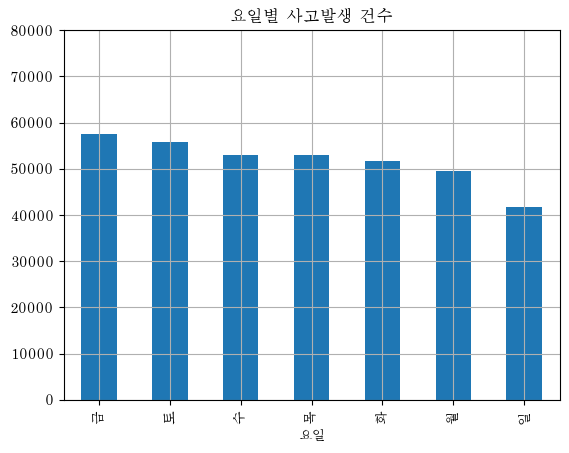

In [34]:
# 요일별 교통사고 발생 건수
Seoul_1018.groupby('요일').size().sort_values(ascending=False).plot(kind='bar', grid=True, title='요일별 사고발생 건수')
plt.ylim(0, 80000)
plt.show()

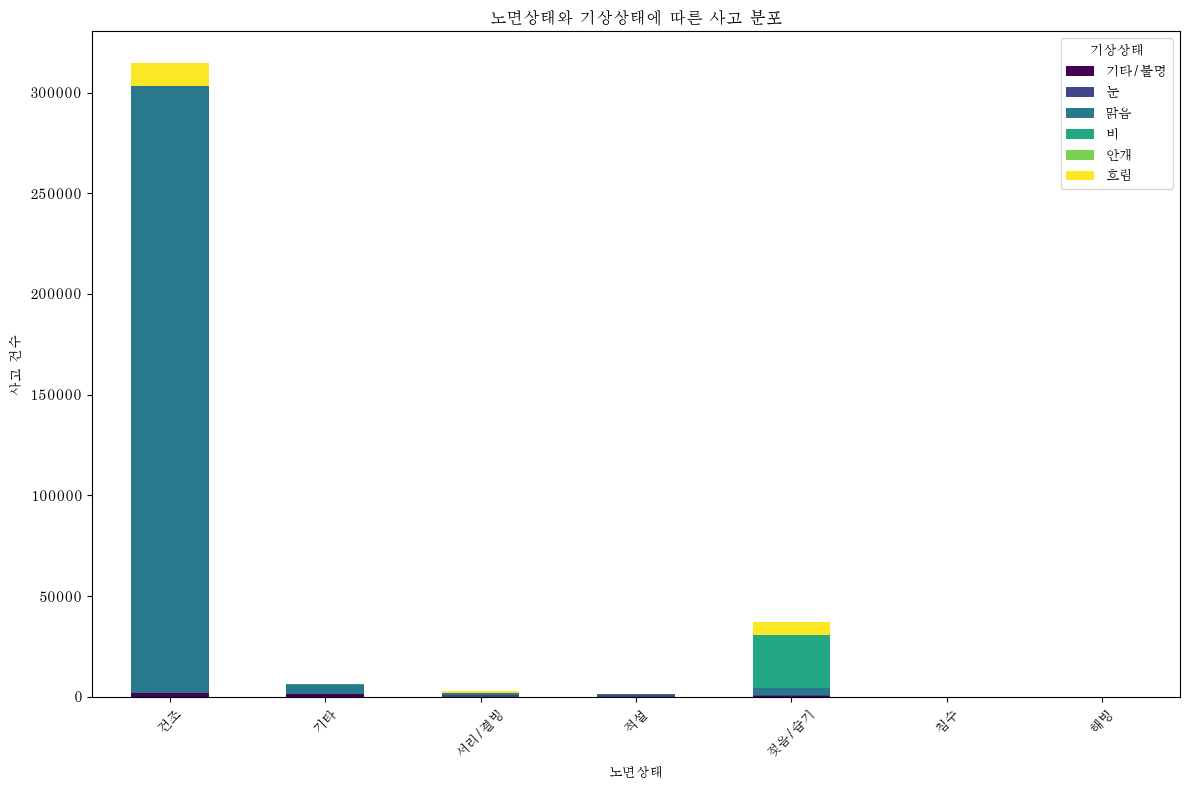

In [91]:
#기상과 노면상태에 따른 사고 건수

file_path = '서울시 개별사고정보(2010_2018).xlsx'

df = pd.read_excel(file_path)

relevant_columns = ['노면상태', '기상상태']
df = df[relevant_columns]

df = df.dropna(subset=relevant_columns)

# Grouping data: Counting occurrences for each combination of 노면상태 and 기상상태
condition_counts = df.groupby(["노면상태", "기상상태"]).size().unstack(fill_value=0)

# Creating the chart
condition_counts.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("노면상태와 기상상태에 따른 사고 분포")
plt.xlabel("노면상태")
plt.ylabel("사고 건수")
plt.legend(title="기상상태")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


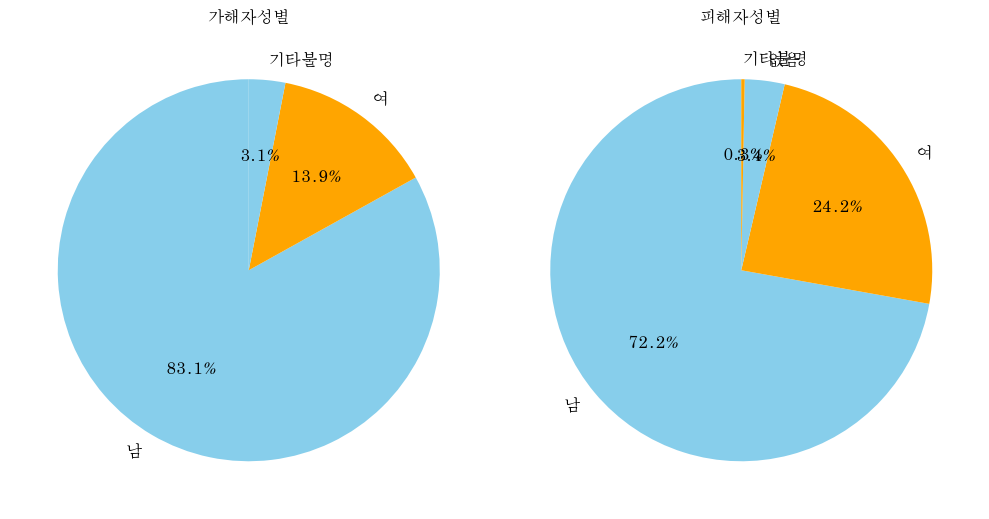

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (파일 이름에 맞게 변경)
file_path = '서울시 개별사고정보(2010_2018).xlsx'
data = pd.read_excel(file_path)

# 가해자 성별 및 피해자 성별 비율 계산
perpetrator_gender = data['가해성별'].value_counts()
victim_gender = data['피해자성별'].value_counts()

# 파이차트 그리기
plt.figure(figsize=(10, 10))

# 가해자 성별 파이차트
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
perpetrator_gender.plot(
    kind='pie', 
    autopct='%.1f%%', 
    startangle=90, 
    colors=['skyblue', 'orange'], 
    title='가해자성별', 
    fontsize=12
)
plt.ylabel('')  # Y축 레이블 제거

# 피해자 성별 파이차트
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
victim_gender.plot(
    kind='pie', 
    autopct='%.1f%%', 
    startangle=90, 
    colors=['skyblue', 'orange'], 
    title='피해자성별', 
    fontsize=12
)
plt.ylabel('')  # Y축 레이블 제거

# 그래프 출력
plt.tight_layout()
plt.show()


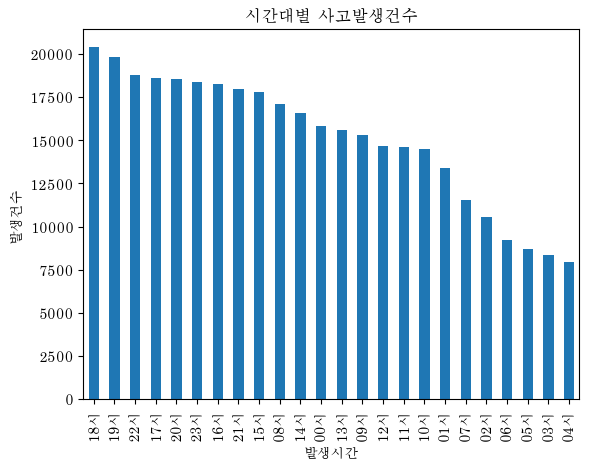

In [10]:
# 시간대별 사고발생건수
Seoul_1018.groupby(Seoul_1018['발생시간']).size().sort_values(ascending=False).plot(kind='bar', title='시간대별 사고발생건수')
plt.ylabel('발생건수')
plt.show()

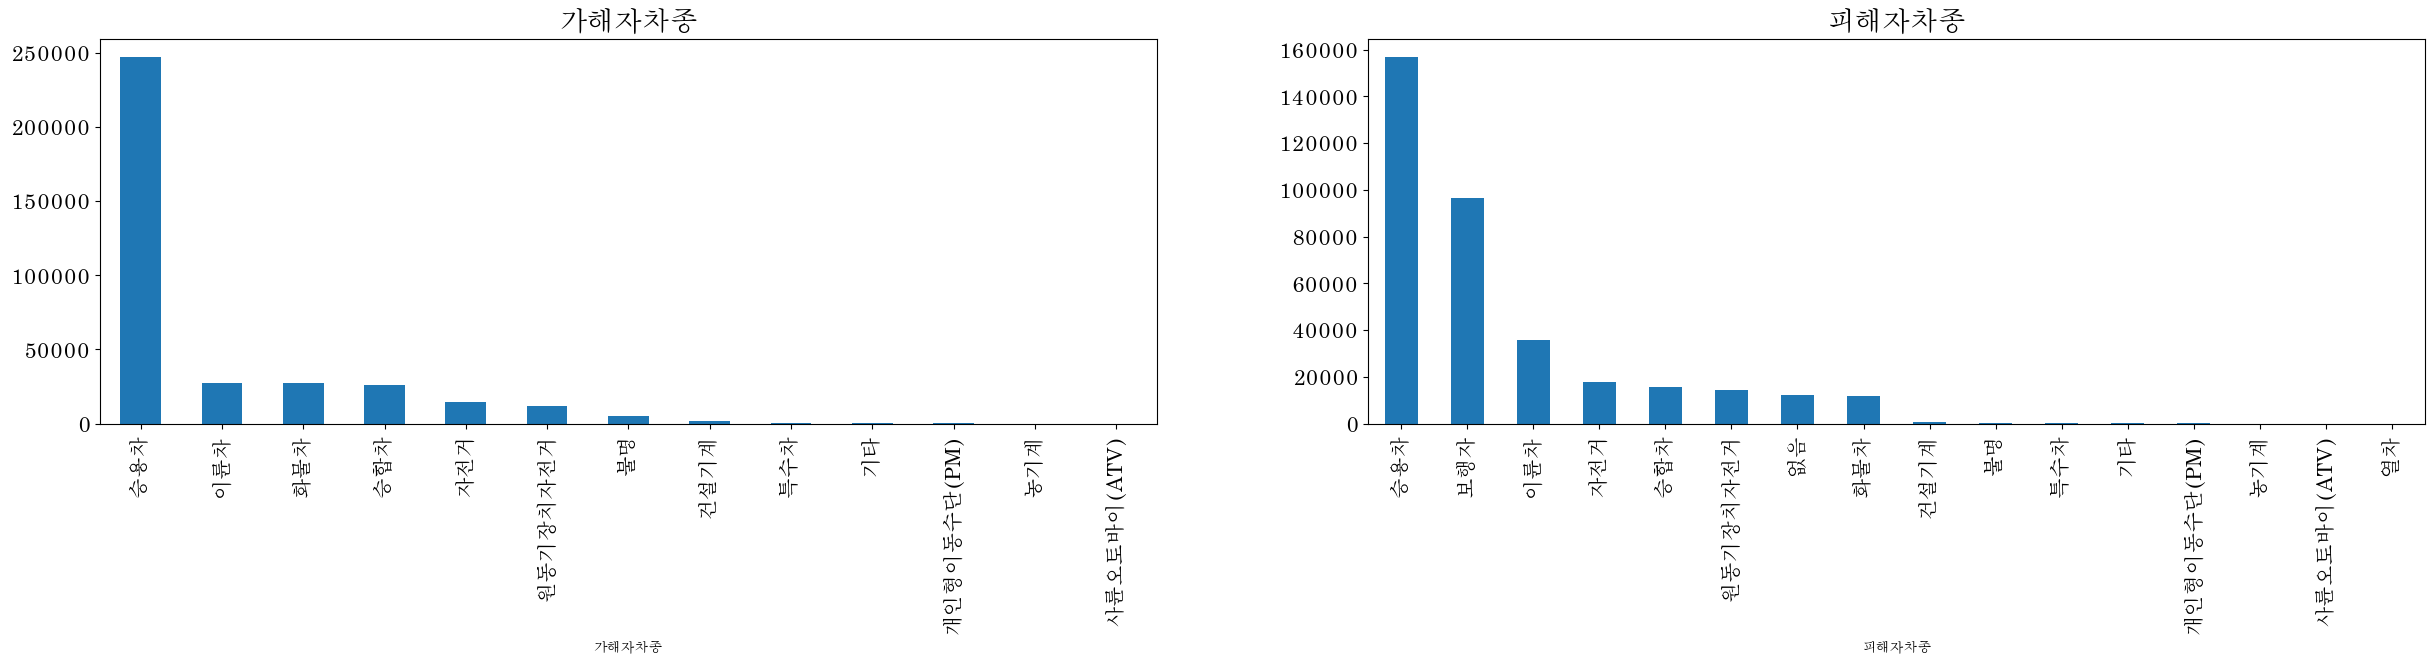

In [11]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
Seoul_1018.groupby(Seoul_1018['가해자차종']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('가해자차종', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
Seoul_1018.groupby(Seoul_1018['피해자차종']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('피해자차종', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

<Axes: title={'center': '가해자법규위반'}, xlabel='가해자법규위반'>

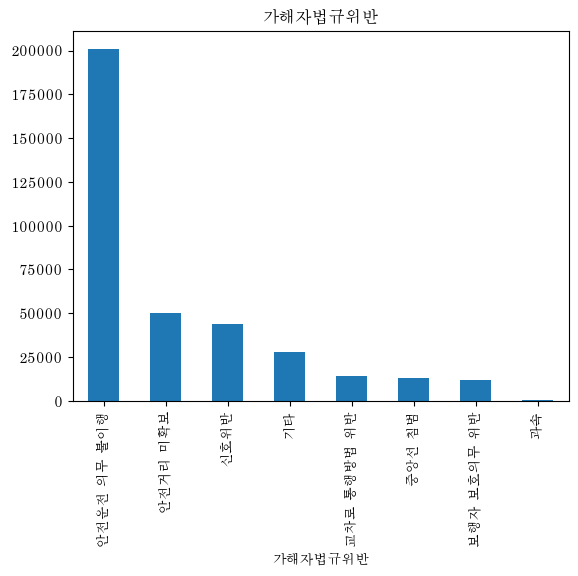

In [12]:
# 가해자법규위반별 교통사고 발생 건수
Seoul_1018.groupby(Seoul_1018['가해자법규위반']).size().sort_values(ascending=False).plot(kind='bar', title='가해자법규위반')

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_43570/985991039.py:11: SyntaxWarning: invalid escape sequence '\d'
  data['가해자연령'] = data['가해자연령'].str.extract('(\d+)').astype(float)  # 숫자 추출


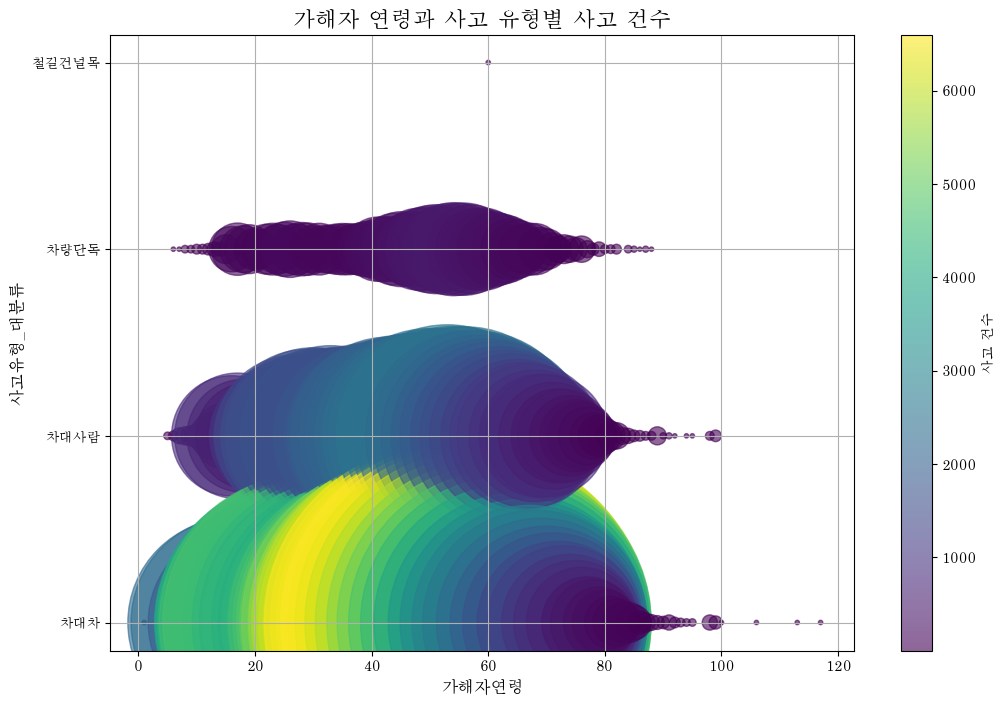

In [13]:
# 최대한 많은 항목을 넣어 만든 버블 차트

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = '서울시 개별사고정보(2010_2018).xlsx'
data = pd.read_excel(file_path)

# 데이터 전처리
data['가해자연령'] = data['가해자연령'].str.extract('(\d+)').astype(float)  # 숫자 추출
bubble_data = data.groupby(['가해자연령', '사고유형_대분류']).size().reset_index(name='사고건수')

# 버블 차트
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble_data['가해자연령'], 
    bubble_data['사고유형_대분류'], 
    s=bubble_data['사고건수'] * 10,  # 버블 크기 조정
    alpha=0.6,
    c=bubble_data['사고건수'],
    cmap='viridis'
)
plt.colorbar(scatter, label='사고 건수')
plt.title('가해자 연령과 사고 유형별 사고 건수', fontsize=16)
plt.xlabel('가해자연령', fontsize=12)
plt.ylabel('사고유형_대분류', fontsize=12)
plt.grid()
plt.show()
